In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import os
import json
import datetime
import dateutil
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from pylab import *

import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from collections import Counter
from sklearn.feature_extraction import DictVectorizer

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
print(os.getcwd())

C:\Users\Rakesh Chauhan\Documents\2nd Sem\Dissertation


In [3]:
#Path = "profiles/"
#fileList = os.listdir(Path)

In [4]:
'''
def read_all():
    
    flag=0
    flag2=0
    
    user_keys = ['alias', 'username', 'numberPosts', 'descriptionProfile', 'numberFollowers', 'numberFollowing', 'urlProfile', 'urlImgProfile', 'website'] # The keys you want
    post_keys = ['url', 'urlImage', 'numberLikes', 'localization', 'date', 'description', 'tags', 'multipleImage', 'mentions', 'isVideo', 'filename'] # The keys you want
    
    
    user_cols=['urlProfile', 'alias', 'numberFollowing', 'numberFollowers', 'username', 'numberPosts', 'website', 'descriptionProfile',  'urlImgProfile']
    
    post_cols = ['url', 'description',  'date', 'numberLikes', 'tags', 'filename', 'urlImage', 'localization', 'isVideo', 'multipleImage', 'mentions']
    
    for k in fileList:
        if k.endswith(".json"):  
            
            # Read file
            with open(Path + str(k), encoding="utf8") as json_data:
                        data = json.load(json_data)
                            
            if (data['posts']!=[]):
                
                if data["descriptionProfile"]!=None:
                    temp=data["descriptionProfile"]
                    data["descriptionProfile"]=temp[0]
                           
                # Generate user data
                user_data=dict((k, data[k]) for k in user_keys if k in data)
                user_df=pd.DataFrame.from_dict(user_data, orient='index').T

                # Generate posts data for given user
                for i in range(0,len(data['posts'])):
                    
                    for k in post_keys:
                        if k in data['posts'][i]:
                            if isinstance(data['posts'][i][k], str):
                                data['posts'][i][k]=data['posts'][i][k].replace('\r','')

                    post=dict((k, data['posts'][i][k]) for k in post_keys if k in data['posts'][i])

                    if (flag==0):
                        all_posts=np.hstack((user_df, pd.DataFrame.from_dict(post, orient='index').T))
                        flag=1
                    else:
                        new_post=np.hstack((user_df, pd.DataFrame.from_dict(post, orient='index').T))
                        all_posts=np.vstack((all_posts,new_post)) 


                if (flag2==0):
                    total=pd.DataFrame(all_posts, columns=list(reversed(user_keys))+list(reversed(post_keys)))
                    flag2=1
                else:
                    total=np.vstack((total,pd.DataFrame(all_posts, columns=list(reversed(user_keys))+list(reversed(post_keys)))))   
           
                flag=0

    dataset=pd.DataFrame(total, columns=user_cols+post_cols)
    return dataset[["alias", "username", "numberFollowers", "numberFollowing", "numberPosts", 'urlProfile', 'urlImgProfile', 'descriptionProfile', 'website', 'filename', 'url', 'urlImage', 'numberLikes', 'description', 'tags', 'mentions', 'localization', 'date', 'multipleImage', 'isVideo']]
'''    

In [6]:
#dataset = read_all()

#dataset.to_csv("Instagram_dataset.csv", index=False)

In [184]:
full = pd.read_csv("dataset.csv", na_values='NaN')

y = full['numberLikes']

In [11]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 20 columns):
numberPosts           16539 non-null int64
website               14652 non-null object
urlProfile            16539 non-null object
username              16335 non-null object
numberFollowing       16539 non-null int64
descriptionProfile    16148 non-null object
alias                 16539 non-null object
numberFollowers       16539 non-null int64
urlImgProfile         16539 non-null object
filename              16539 non-null object
date                  16539 non-null object
urlImage              16539 non-null object
mentions              16539 non-null object
multipleImage         16539 non-null bool
isVideo               16539 non-null bool
localization          6887 non-null object
tags                  16539 non-null object
numberLikes           16539 non-null int64
url                   16539 non-null object
description           16319 non-null object
dtypes: bool(2), int

In [185]:
toDrop = ['username', 'urlProfile', 'urlImgProfile',\
          'filename', 'url', 'urlImage', 'isVideo']
processed = full.drop(toDrop, axis=1)

nonCat = ['descriptionProfile', 'description', 'tags', 'mentions', 'localization']
processed = processed.drop(nonCat, axis=1)

In [186]:
pd.options.display.float_format = '{:.2f}'.format
processed.describe()

,numberPosts,numberFollowing,numberFollowers,numberLikes
count,16539.00,16539.00,16539.00,16539.00
mean,2315.73,2590.56,997829.41,24414.26
std,2655.38,59090.66,1934400.77,64220.60
min,15.00,0.00,124965.00,0.00
25%,787.00,191.00,198039.00,3232.50
50%,1481.00,396.00,393843.00,7351.00
75%,2932.00,645.00,935310.00,18357.00
max,27671.00,1838511.00,22130730.00,1115123.00


In [187]:
processed['youtube'] = processed['website'].str.contains('youtube|youtu',na=False).astype(int)
processed['music']=processed['website'].str.contains("soundcloud|spoti",na=False).astype(int)
processed['tumblr']=processed['website'].str.contains("tumblr",na=False).astype(int)
processed['facebook']=processed['website'].str.contains("facebook",na=False).astype(int)
processed['blog']=processed['website'].str.contains("blog|wordpress",na=False).astype(int)
processed['twitter']=processed['website'].str.contains("twitter",na=False).astype(int)
processed['other']=processed['website'].str.contains(".",na=False).astype(int)
processed = processed.drop(['website'], axis=1)

In [188]:
processed['multipleImage'] = processed['multipleImage'].astype(int)

In [189]:
print(len(processed))

16539


In [190]:
le = preprocessing.LabelEncoder()
le.fit(processed["alias"])
list(le.classes_)
alias_num = le.transform(processed['alias'])
processed['alias'] = alias_num

In [191]:
copy=processed["date"].copy()
for i in range(0, len(processed)):
    copy[i] = datetime.datetime.weekday((dateutil.parser.parse(processed["date"][i])))
processed["date"]=copy.astype(np.int64)

processed['mon']=(processed['date']==0).astype(int)
processed['tue']=(processed['date']==1).astype(int)
processed['wed']=(processed['date']==2).astype(int)
processed['thu']=(processed['date']==3).astype(int)
processed['fri']=(processed['date']==4).astype(int)
processed['sat']=(processed['date']==5).astype(int)
processed['sun']=(processed['date']==6).astype(int)

processed = processed.drop(['date'], axis=1)

In [192]:
processed.head()

,numberPosts,numberFollowing,alias,numberFollowers,multipleImage,numberLikes,youtube,music,tumblr,facebook,blog,twitter,other,mon,tue,wed,thu,fri,sat,sun
0,988,233,0,720979,0,10047,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,988,233,0,720979,0,16781,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,988,233,0,720979,0,11227,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,988,233,0,720979,0,21539,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,988,233,0,720979,0,21054,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [193]:
processed.shape

(16539, 20)

In [194]:
numTags=[]
for h in full.tags:
    numTags.append(h.count('#'))

In [195]:
full.columns

Index(['numberPosts', 'website', 'urlProfile', 'username', 'numberFollowing',
       'descriptionProfile', 'alias', 'numberFollowers', 'urlImgProfile',
       'filename', 'date', 'urlImage', 'mentions', 'multipleImage', 'isVideo',
       'localization', 'tags', 'numberLikes', 'url', 'description'],
      dtype='object')

In [196]:
type(numTags)

list

In [197]:
numMentions=[]
for m in full['mentions']:
    numMentions.append(m.count('@'))

In [198]:
len(numMentions)

16539

In [199]:
print(all(isinstance(n, int) for n in numMentions))

print(all(isinstance(n, int) for n in numTags))

<generator object <genexpr> at 0x00000203A209B728>
<generator object <genexpr> at 0x00000203A209B728>


In [200]:
nt = pd.Series(numTags)
nm = pd.Series(numMentions)

In [201]:
processed['numberTags'] = nt.values

processed['numberMentions'] = nm.values

In [202]:
processed.shape

(16539, 22)

In [203]:
def count_days(day):
    counter = 0
    for sun in processed[day]:
        if sun == 1:
            counter = counter + 1
    return counter

In [204]:
def post_perc_day(day):
    return round((day/len(processed))*100,2)

In [205]:
tot_sun = count_days('sun')
tot_mon = count_days('mon')
tot_tue = count_days('tue')
tot_wed = count_days('wed')
tot_thu = count_days('thu')
tot_fri = count_days('fri')
tot_sat = count_days('sat')

In [206]:
print(tot_sun)
print(tot_mon)
print(tot_tue)
print(tot_wed)
print(tot_thu)
print(tot_fri)
print(tot_sat)

3047
1785
2135
2240
2419
2418
2495


In [207]:
tot_days = [tot_mon, tot_tue, tot_wed, tot_thu, tot_fri, tot_sat, tot_sun]

In [208]:
plist = []
for tot in tot_days:
    print(post_perc_day(tot))
    plist.append(post_perc_day(tot))

10.79
12.91
13.54
14.63
14.62
15.09
18.42


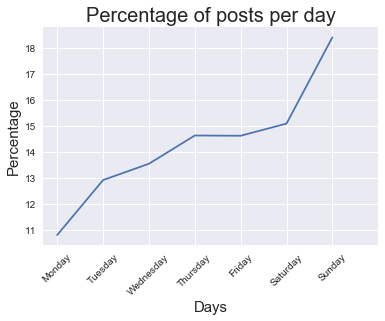

In [209]:
plt.plot(plist,)
plt.title('Percentage of posts per day', fontsize=20)
plt.ylabel('Percentage', fontsize=15)
plt.xlabel('Days', fontsize=15)
plt.xticks(arange(8), ('Monday', 'Tuesday', 'Wednesday',\
                       'Thursday', 'Friday', 'Saturday', 'Sunday' ),\
          rotation = 45)
plt.show()

In [210]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 22 columns):
numberPosts        16539 non-null int64
numberFollowing    16539 non-null int64
alias              16539 non-null int64
numberFollowers    16539 non-null int64
multipleImage      16539 non-null int32
numberLikes        16539 non-null int64
youtube            16539 non-null int32
music              16539 non-null int32
tumblr             16539 non-null int32
facebook           16539 non-null int32
blog               16539 non-null int32
twitter            16539 non-null int32
other              16539 non-null int32
mon                16539 non-null int32
tue                16539 non-null int32
wed                16539 non-null int32
thu                16539 non-null int32
fri                16539 non-null int32
sat                16539 non-null int32
sun                16539 non-null int32
numberTags         16539 non-null int64
numberMentions     16539 non-null int64
dtypes: int

In [211]:
pro_copy = processed

# Filtering

In [212]:
avgLikes = []
numFollowers = []
selection = []

for i in range(0, np.max(processed['alias']+1, axis=0)):
    numFollowers = np.append(numFollowers, processed[processed['alias']==i]['numberFollowers'].iloc[0])
    avgLikes = np.append(avgLikes, np.sum(processed[processed['alias']==i]['numberLikes'])/len(processed[processed['alias']==i]))
    processed.loc[processed['alias']==i, 'mean']=avgLikes[i]
    selection = np.append(selection, i)

In [213]:
len(selection)

973

In [109]:
selection[0:10]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [214]:
filtered = processed[processed['alias'].isin(selection)]

filtered.describe()

,numberPosts,numberFollowing,alias,numberFollowers,multipleImage,numberLikes,youtube,music,tumblr,facebook,...,mon,tue,wed,thu,fri,sat,sun,numberTags,numberMentions,mean
count,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,...,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00
mean,2315.73,2590.56,485.94,997829.41,0.03,24414.26,0.14,0.01,0.00,0.04,...,0.11,0.13,0.14,0.15,0.15,0.15,0.18,2.37,2.67,24414.26
std,2655.38,59090.66,280.86,1934400.77,0.17,64220.60,0.34,0.07,0.03,0.20,...,0.31,0.34,0.34,0.35,0.35,0.36,0.39,4.88,3.85,61676.81
min,15.00,0.00,0.00,124965.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.87
25%,787.00,191.00,243.00,198039.00,0.00,3232.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3594.76
50%,1481.00,396.00,486.00,393843.00,0.00,7351.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,7678.65
75%,2932.00,645.00,729.00,935310.00,0.00,18357.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00,18718.94
max,27671.00,1838511.00,972.00,22130730.00,1.00,1115123.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,31.00,57.00,875806.41


In [111]:
processed[processed['alias'].astype(int)==0][0:2]

,numberPosts,numberFollowing,alias,numberFollowers,multipleImage,numberLikes,youtube,music,tumblr,facebook,...,mon,tue,wed,thu,fri,sat,sun,numberTags,numberMentions,mean
0,988,233,0,720979,0,10047,0,0,0,0,...,0,0,0,0,0,1,0,1,7,23400.94
1,988,233,0,720979,0,16781,0,0,0,0,...,0,0,0,0,0,1,0,3,8,23400.94


In [218]:
pr = processed.copy()

In [219]:
pr.shape

(16539, 23)

In [112]:
pro_copy.head()

,numberPosts,website,numberFollowing,descriptionProfile,alias,numberFollowers,date,mentions,multipleImage,localization,tags,numberLikes,description,aliasNum
0,988,www.sylviemeis.de,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,2017-04-29T05:00:00.000Z,"['@fraukeludowig_official', '@rtl_exclusiv', '...",False,NaN,['#exclusivspezial'],10047,With my lovely colleague @fraukeludowig_offici...,0
1,988,www.sylviemeis.de,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,2017-04-29T05:00:00.000Z,"['@tine', '@rachelzoe', '@lecolook', '@letsdan...",False,NaN,"['#jumpsuit', '#glam', '#ootn']",16781,"My look last night, hosting Let's Dance! Style...",0
2,988,www.sylviemeis.de,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,2017-04-27T05:00:00.000Z,"['@letsdance', '@rtlde', '@rtlde', '@letsdance']",False,NaN,"['#rehearsalday', '#behindthescenes']",11227,Calm before the 'glam' storm! 💋💄💅🏻💆🏼💇🏼Tomorrow...,0
3,988,www.sylviemeis.de,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,2017-04-24T05:00:00.000Z,"['@bydanienl', '@roland_mouret', '@casadeioffi...",False,NaN,"['#dress', '#shoes', '#glam']",21539,🌼Today's look for QVC.. styled by @bydanienl #...,0
4,988,www.sylviemeis.de,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,2017-04-22T05:00:00.000Z,"['@elisabettafranchi', '@serenagoldenbaum']",False,NaN,"['#weekend', '#yay', '#happyweekend', '#kiss']",21054,💋Happy Weekend Lovelies ❤ #weekend #yay #happy...,0


In [215]:
filtered = pro_copy[pro_copy['alias'].isin(selection)]
filtered.describe()

,numberPosts,numberFollowing,alias,numberFollowers,multipleImage,numberLikes,youtube,music,tumblr,facebook,...,mon,tue,wed,thu,fri,sat,sun,numberTags,numberMentions,mean
count,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,...,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00,16539.00
mean,2315.73,2590.56,485.94,997829.41,0.03,24414.26,0.14,0.01,0.00,0.04,...,0.11,0.13,0.14,0.15,0.15,0.15,0.18,2.37,2.67,24414.26
std,2655.38,59090.66,280.86,1934400.77,0.17,64220.60,0.34,0.07,0.03,0.20,...,0.31,0.34,0.34,0.35,0.35,0.36,0.39,4.88,3.85,61676.81
min,15.00,0.00,0.00,124965.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,110.87
25%,787.00,191.00,243.00,198039.00,0.00,3232.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3594.76
50%,1481.00,396.00,486.00,393843.00,0.00,7351.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,7678.65
75%,2932.00,645.00,729.00,935310.00,0.00,18357.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00,18718.94
max,27671.00,1838511.00,972.00,22130730.00,1.00,1115123.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,31.00,57.00,875806.41


In [216]:
modified = filtered.drop(['alias'],axis=1)
modified = modified.reset_index(drop=True)

In [217]:
modified.head()

,numberPosts,numberFollowing,numberFollowers,multipleImage,numberLikes,youtube,music,tumblr,facebook,blog,...,mon,tue,wed,thu,fri,sat,sun,numberTags,numberMentions,mean
0,988,233,720979,0,10047,0,0,0,0,0,...,0,0,0,0,0,1,0,1,7,23400.94
1,988,233,720979,0,16781,0,0,0,0,0,...,0,0,0,0,0,1,0,3,8,23400.94
2,988,233,720979,0,11227,0,0,0,0,0,...,0,0,0,1,0,0,0,2,4,23400.94
3,988,233,720979,0,21539,0,0,0,0,0,...,1,0,0,0,0,0,0,3,13,23400.94
4,988,233,720979,0,21054,0,0,0,0,0,...,0,0,0,0,0,1,0,4,2,23400.94


# NLP - feature extraction

In [220]:
full = pd.read_csv('dataset.csv', na_values='NaN')

In [221]:
y = full['numberLikes']

In [222]:
toDrop = ['username', 'urlProfile', 'urlImgProfile', 'filename', 'url', 'urlImage', 'isVideo']
processed = full.drop(toDrop,axis=1)

In [223]:
le = preprocessing.LabelEncoder()
le.fit(processed["alias"])
list(le.classes_)
alias_num=le.transform(processed["alias"])
#list(le.inverse_transform(alias_num))
processed["aliasNum"]=alias_num

In [224]:
avgLikes = []
numFollowers = []
selection = []

for i in range(0,np.max(processed["aliasNum"],axis=0)):
    numFollowers=np.append(numFollowers, processed[processed["aliasNum"]==i]['numberFollowers'].iloc[0])
    avgLikes=np.append(avgLikes, np.sum(processed[processed["aliasNum"]==i]["numberLikes"])/len(processed[processed["aliasNum"]==i]))
    if (avgLikes[i]<200000 and processed[processed["aliasNum"]==i]['numberFollowers'].iloc[0]<10000000):
        selection=np.append(selection, i)

In [225]:
filtered=processed[processed['aliasNum'].isin(selection)].reset_index(drop=True)

In [226]:
data = filtered
data.describe()

,numberPosts,numberFollowing,numberFollowers,numberLikes,aliasNum
count,16148.00,16148.00,16148.00,16148.00,16148.00
mean,2318.17,2646.36,796490.06,17190.43,484.72
std,2656.96,59800.71,1182281.15,29268.59,280.08
min,15.00,0.00,124965.00,0.00,0.00
25%,800.00,192.00,196489.00,3171.00,242.00
50%,1495.00,397.00,375671.00,7120.50,484.00
75%,2932.00,651.00,882392.00,16994.75,727.00
max,27671.00,1838511.00,9296371.00,364016.00,971.00


In [227]:
data['descriptionProfile'][4]

"TV Host Let's Dance for RTL Germany / SBS6 / Philips-Sonicare / Deichmann - Sylvie Meis ShoeCollection /Holiday On Ice-Believe / Owner Meis Enterprise"

In [228]:
data['description'][4]

'💋Happy Weekend Lovelies ❤ #weekend #yay #happyweekend #kiss 💋'

In [229]:
emoji_regexp = u'[\U00002600-\U000026FF]|[\U00002700-\U000027BF]|[\U0001f300-\U0001f5fF]|[\U0001f600-\U0001f64F]|' \
               u'[\U0001f680-\U0001f6FF]|[\U00002A00-\U00002AFF]|[\U0001F1E0-\U0001F1FF]'
re.findall(emoji_regexp, data['descriptionProfile'][4], re.UNICODE)

[]

In [230]:
text = data['description'][4]
print(text) # with emoji


💋Happy Weekend Lovelies ❤ #weekend #yay #happyweekend #kiss 💋


In [231]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"
        u"\U00002A00-\U00002AFF"
        u"\U00002600-\U000026FF"
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

Happy Weekend Lovelies  #weekend #yay #happyweekend #kiss 


In [232]:
data['descriptionProfile'][6666]

'⚡️Founder & Creative Director @laagam______ •beatriz@okikotalents.com •inesarroyoruiz@gmail.com'

In [233]:

letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      data['descriptionProfile'][6666])

In [234]:
letters_only

'  Founder   Creative Director  laagam        beatriz okikotalents com  inesarroyoruiz gmail com'

In [235]:
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words
words

['founder',
 'creative',
 'director',
 'laagam',
 'beatriz',
 'okikotalents',
 'com',
 'inesarroyoruiz',
 'gmail',
 'com']

In [236]:
from nltk.corpus import stopwords
words = [w for w in words if not w in stopwords.words("english")]
words

['founder',
 'creative',
 'director',
 'laagam',
 'beatriz',
 'okikotalents',
 'com',
 'inesarroyoruiz',
 'gmail',
 'com']

In [237]:
" ".join(words)

'founder creative director laagam beatriz okikotalents com inesarroyoruiz gmail com'

In [238]:
def cleanup(sentence):
    try:
        letters_only = re.sub("[^a-zA-Z]", " ", sentence)
        emojis = re.findall(emoji_regexp, sentence, re.UNICODE)
    except:
        letters_only = ''
        emojis = []
    words = letters_only.lower().split()        
    words = [w for w in words if not w in stopwords.words("english")]
    words = [w for w in words if len(w) > 1]
    return (" ".join(words)), (" ".join(emojis))

In [239]:
sentence, emojis = cleanup(data['description'][4])
sentence

'happy weekend lovelies weekend yay happyweekend kiss'

In [240]:
emojis

'💋 ❤ 💋'

In [241]:
data['description'].size

16148

In [242]:
clean = []
clean_emojis = []
for i in range( 0, data['description'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/16148*100))+"% done")
    x,y = cleanup(data['description'][i])
    clean.append(x)
    clean_emojis.append(y)

6% done
12% done
19% done
25% done
31% done
37% done
43% done
50% done
56% done
62% done
68% done
74% done
80% done
87% done
93% done
99% done


In [243]:
clean[:5]

['lovely colleague fraukeludowig official show exclusivspezial rtl exclusiv tine siepmann lecolook',
 'look last night hosting let dance styled tine siepmann jumpsuit rachelzoe hair makeup lecolook glam letsdance rtlde ootn',
 'calm glam storm tomorrow room hair makeup chaos chilling backstage letsdance rtlde rehearsalday behindthescenes',
 'today look qvc styled bydanienl dress roland mouret shoes casadeiofficial glam xellycvk philipsbenelux philipssonicare qvcdeutschland',
 'happy weekend lovelies weekend yay happyweekend kiss']

In [244]:
len(clean_emojis)

16148

In [245]:
clean_vectorizer = CountVectorizer(analyzer='word', tokenizer=None,\
                                   preprocessor=None, stop_words=None,\
                                   max_features = 500)

clean_features = clean_vectorizer.fit_transform(clean)
clean_features = clean_features.toarray()

In [246]:
clean_features[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [247]:
vocab = clean_vectorizer.get_feature_names()
print(vocab)

['able', 'account', 'actually', 'ad', 'ada', 'add', 'adventure', 'ago', 'air', 'al', 'allah', 'almost', 'along', 'already', 'also', 'always', 'amazing', 'amg', 'another', 'anyone', 'anything', 'april', 'architecture', 'around', 'art', 'available', 'away', 'awesome', 'baby', 'back', 'barcelona', 'beach', 'beautiful', 'beautifuldestinations', 'beauty', 'become', 'behind', 'believe', 'berlin', 'best', 'better', 'big', 'bio', 'birthday', 'bit', 'black', 'blog', 'blue', 'body', 'book', 'breakfast', 'bring', 'california', 'came', 'camera', 'car', 'cars', 'cat', 'cave', 'ch', 'challenge', 'chance', 'change', 'check', 'chocolate', 'city', 'click', 'close', 'coachella', 'coast', 'code', 'coffee', 'collection', 'color', 'com', 'come', 'comes', 'coming', 'comment', 'community', 'como', 'con', 'conservation', 'cool', 'could', 'couple', 'course', 'cream', 'cute', 'da', 'dan', 'dari', 'day', 'days', 'de', 'deep', 'del', 'delicious', 'dengan', 'design', 'details', 'di', 'dia', 'different', 'done', 'd

In [248]:
new_vocab = []
for word in vocab:
    if len(word)>5:
        new_vocab.append(word)
print(' '.join(new_vocab))

account actually adventure almost already always amazing another anyone anything architecture around available awesome barcelona beautiful beautifuldestinations beauty become behind believe berlin better birthday breakfast california camera challenge chance change chocolate coachella coffee collection coming comment community conservation couple course delicious dengan design details different easter enough europe everyone everything excited experience explore family fashion favorite favourite featured feeling finally fitness follow followers forget france friday friend friends geographic getting gracias grateful guides hashtag healthy images important incredible inspiration inspired instagram island journey liketk liketkit liketoknow little living location london looking lovely madwhips magazine makeup making mercedes millionaire moment moments monday morning mother mountain mountains natgeo natgeocreative national natural nature nothing official online outfit people perfect performan

In [249]:
clean_features = pd.DataFrame(data=clean_features, columns=vocab)
clean_features.head()

,able,account,actually,ad,ada,add,adventure,ago,air,al,...,yang,year,years,yes,yesterday,yet,yo,yoga,young,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
clean_emojis_vectorizer = DictVectorizer()
X = clean_emojis_vectorizer.fit_transform(Counter(s.split())\
                                          for s in clean_emojis)

clean_emojis_features = X.toarray()

In [251]:
clean_emojis_features.shape

(16148, 746)

In [252]:
#create list of unique emojis
emojis = set()
for i in range (16148):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            emojis.add(emoji)
emojis = list(emojis)
test = np.zeros(shape=(16148,750))

#create sentence to vector
for i in range (16148):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            test[i][emojis.index(emoji)]+=1

In [253]:
test_emoji = np.zeros(shape=(1,746))
for i in range (16148):
    for j in range(746):
        if test[i][j] > 0:
            test_emoji[:,j]+=test[i][j]

In [254]:
count = 0
count_list = []
for i in range(746):
    if test_emoji[:,i]>175:
        count+=1
        count_list.append(i)
print(count_list)

[20, 23, 39, 45, 56, 103, 128, 152, 155, 210, 236, 278, 283, 298, 319, 346, 354, 371, 433, 467, 469, 525, 565, 566, 579, 591, 605, 623, 634, 638, 652, 660, 692, 698, 705, 725, 740]


In [255]:
clean_features_emoji = pd.DataFrame(data=test[:,count_list])
clean_features_emoji.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,16148.00,16148.00,16148.00,16148.00,16148.00,16148.00,16148.00,16148.00,16148.00,16148.00,...,16148.00,16148.00,16148.00,16148.00,16148.00,16148.00,16148.00,16148.00,16148.00,16148.00
mean,0.03,0.01,0.02,0.07,0.01,0.03,0.02,0.01,0.08,0.01,...,0.03,0.01,0.01,0.01,0.06,0.03,0.02,0.02,0.04,0.03
std,0.22,0.16,0.17,0.52,0.12,0.17,0.20,0.16,0.37,0.13,...,0.25,0.19,0.14,0.14,0.35,0.17,0.17,0.19,0.23,0.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,5.00,6.00,9.00,16.00,6.00,3.00,9.00,12.00,8.00,3.00,...,8.00,10.00,6.00,6.00,8.00,5.00,6.00,7.00,6.00,2.00


In [256]:
emoji_set = set()
for i in range (16148):
    if clean_emojis[i]:
        for emoji in clean_emojis[i].split():
            if emojis.index(emoji) in count_list:
                emoji_set.add(emoji)
print (' '.join(emoji_set))

❤ 🌴 😎 🙌 ➖ 🙏 😘 👇 💪 😊 🌸 ☀ 🔥 👉 ✨ 💗 😉 📷 🎉 💕 💋 💛 😍 🏼 🖤 📸 ✌ 👌 😂 😜 😋 🏽 🙈 💙 💰 🚨 🏻


### User description

In [257]:
clean_user = []
clean_user_emojis = []
for i in range( 0, data['descriptionProfile'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/16539*100))+"% done")
    x,y = cleanup(data['descriptionProfile'][i])
    clean_user.append(x)
    clean_user_emojis.append(y)

6% done
12% done
18% done
24% done
30% done
36% done
42% done
48% done
54% done
60% done
67% done
73% done
79% done
85% done
91% done
97% done


In [258]:
clean_user_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250) 
clean_user_features = clean_user_vectorizer.fit_transform(clean_user)
clean_user_features = clean_user_features.toarray()
clean_user_features.shape

(16148, 250)

In [259]:
vocab = clean_user_vectorizer.get_feature_names()
print(vocab)

['account', 'actor', 'actress', 'adventure', 'adventures', 'advertising', 'ambassador', 'amsterdam', 'angeles', 'anthony', 'art', 'artist', 'athlete', 'au', 'australia', 'author', 'available', 'bali', 'based', 'beautiful', 'beauty', 'best', 'blog', 'blogger', 'book', 'booking', 'bookings', 'br', 'brand', 'brasil', 'business', 'california', 'camera', 'cat', 'ceo', 'cep', 'channel', 'check', 'city', 'click', 'co', 'coach', 'collaborations', 'com', 'community', 'consultant', 'contact', 'contato', 'content', 'contributor', 'cookbook', 'creative', 'creator', 'credit', 'currently', 'daily', 'day', 'de', 'design', 'designer', 'digital', 'director', 'dog', 'download', 'dream', 'dreams', 'dubai', 'earth', 'el', 'em', 'email', 'enquiries', 'entrepreneur', 'explorer', 'facebook', 'family', 'fashion', 'fb', 'feature', 'featured', 'feed', 'filmmaker', 'fitness', 'follow', 'food', 'founder', 'free', 'freelance', 'french', 'fun', 'geographic', 'germany', 'get', 'girl', 'gmail', 'go', 'good', 'great',

In [260]:
clean_user_features = pd.DataFrame(data=clean_user_features, columns=vocab)
clean_user_features.head()

,account,actor,actress,adventure,adventures,advertising,ambassador,amsterdam,angeles,anthony,...,workshops,world,worldwide,writer,www,yahoo,yoga,york,youtube,youtuber
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
clean_user_emojis_vectorizer = DictVectorizer()
X = clean_user_emojis_vectorizer.fit_transform(Counter(s.split()) for s in clean_user_emojis)
clean_user_emojis_features = X.toarray()
clean_user_emojis_features.shape

(16148, 377)

#### Localization

In [262]:
data['localization'][23]

nan

In [263]:
sentence, emojis = cleanup(data['localization'][23])

In [264]:
sentence

''

In [265]:
emojis

''

In [266]:
clean_places = []
clean_places_emojis = []
for i in range( 0, data['localization'].size ):
    if( (i+1)%1000 == 0 ):
        print(str(round(i/16539*100))+"% done")
    x,y = cleanup(data['localization'][i])
    if len(y) > 0:
        print('yes')
    clean_places.append(x)
    clean_places_emojis.append(y)

6% done
12% done
18% done
24% done
30% done
36% done
42% done
48% done
54% done
60% done
67% done
73% done
79% done
85% done
91% done
97% done


In [267]:
clean_places_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250) 
clean_places_features = clean_places_vectorizer.fit_transform(clean_places)
clean_places_features = clean_places_features.toarray()
clean_places_features.shape

(16148, 250)

In [268]:
vocab = clean_places_vectorizer.get_feature_names()
print(vocab)

['abu', 'affalterbach', 'airport', 'alberta', 'american', 'amg', 'amsterdam', 'angeles', 'antarctica', 'arab', 'argentina', 'arizona', 'art', 'arts', 'atlanta', 'australia', 'austria', 'bali', 'bar', 'barcelona', 'baselworld', 'bay', 'beach', 'beirut', 'bel', 'belgium', 'berlin', 'beverly', 'big', 'bio', 'black', 'blue', 'bordeaux', 'brazil', 'bridge', 'brooklyn', 'cafe', 'california', 'cannes', 'canyon', 'cape', 'carlton', 'center', 'central', 'centre', 'china', 'city', 'club', 'coachella', 'coast', 'coffee', 'colombia', 'columbia', 'constance', 'copenhagen', 'cuba', 'dallas', 'de', 'del', 'denmark', 'desert', 'dhabi', 'di', 'disney', 'district', 'dolomiti', 'downtown', 'dtla', 'du', 'dubai', 'east', 'el', 'eleuthera', 'emirates', 'falls', 'faroe', 'festival', 'finland', 'fitness', 'florida', 'forn', 'four', 'france', 'francesc', 'francisco', 'frankfurt', 'garden', 'georgia', 'germany', 'gold', 'grand', 'greece', 'halaveli', 'hamburg', 'havana', 'hawaii', 'hills', 'hollywood', 'hong',

In [269]:
clean_places_features = pd.DataFrame(data=clean_places_features, columns=vocab)
clean_places_features.head()

,abu,affalterbach,airport,alberta,american,amg,amsterdam,angeles,antarctica,arab,...,wales,walt,washington,watch,west,western,whistler,williamsburg,world,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
dataset1 = np.hstack((clean_features, clean_features_emoji))

In [271]:
dataset1.shape

(16148, 537)

In [272]:
dataset2 = np.hstack((data.numberFollowers.as_matrix().reshape(16148,1),\
                      data.numberFollowing.as_matrix().reshape(16148,1),\
                      data.numberPosts.as_matrix().reshape(16148,1)))

In [273]:
dataset2.shape

(16148, 3)

In [274]:
dataset2[:5]

array([[720979,    233,    988],
       [720979,    233,    988],
       [720979,    233,    988],
       [720979,    233,    988],
       [720979,    233,    988]], dtype=int64)

In [275]:
ds = np.hstack((dataset1,dataset2))

In [276]:
ds.shape

(16148, 540)

In [277]:
pd.concat([clean_features, clean_features_emoji], axis=1).to_csv('NLP1_feature.csv')

In [281]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 14 columns):
numberPosts           16539 non-null int64
website               14652 non-null object
numberFollowing       16539 non-null int64
descriptionProfile    16148 non-null object
alias                 16539 non-null object
numberFollowers       16539 non-null int64
date                  16539 non-null object
mentions              16539 non-null object
multipleImage         16539 non-null bool
localization          6887 non-null object
tags                  16539 non-null object
numberLikes           16539 non-null int64
description           16319 non-null object
aliasNum              16539 non-null int64
dtypes: bool(1), int64(5), object(8)
memory usage: 1.7+ MB


In [280]:
pd.concat([clean_features, clean_user_features], axis=1).to_csv('NLP2_feature.csv')

---

# Prediction

In [282]:
nlp = pd.read_csv("NLP2_feature.csv", na_values='NaN')

In [283]:
process = pd.concat([pro_copy,nlp], axis=1)

In [284]:
process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Columns: 774 entries, numberPosts to youtuber
dtypes: float64(752), int32(15), int64(7)
memory usage: 96.7 MB


In [286]:
#processed.to_csv('processed.csv', index=False)
process.head()

,numberPosts,numberFollowing,alias,numberFollowers,multipleImage,numberLikes,youtube,music,tumblr,facebook,...,workshops,world.1,worldwide,writer,www.1,yahoo,yoga.1,york,youtube.1,youtuber
0,988,233,0,720979,0,10047,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,988,233,0,720979,0,16781,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,988,233,0,720979,0,11227,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,988,233,0,720979,0,21539,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,988,233,0,720979,0,21054,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [297]:
process.to_csv('process.csv', index=False)

In [287]:
process[process["alias"].astype(int)==0][3:6]

,numberPosts,numberFollowing,alias,numberFollowers,multipleImage,numberLikes,youtube,music,tumblr,facebook,...,workshops,world.1,worldwide,writer,www.1,yahoo,yoga.1,york,youtube.1,youtuber
3,988,233,0,720979,0,21539,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,988,233,0,720979,0,21054,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,988,233,0,720979,0,12375,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [288]:
deleted = process[process['alias'].astype(int)==0][0:2]
test = process[process['alias'].astype(int)==0][3:6]
train = process[process['alias'].astype(int)==0][6:len(process[process["alias"].astype(int)==0])]

for i in range(1, np.max(process['alias'].astype(int),axis=0)):
    deleted = pd.concat([deleted, process[process['alias']==i][0:2]], axis=0)
    test = pd.concat([test, process[process['alias']==i][3:6]], axis=0)
    train = pd.concat([train, process[process['alias']==i][6:len(process[process["alias"]==i])]], axis=0)

In [289]:
X_train = train
X_test = test
y_train = train['numberLikes']
X_train = X_train.drop(['numberLikes'],axis=1)
y_test = test['numberLikes']
X_test = X_test.drop(['numberLikes'],axis=1)

In [290]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10690, 773)
(2916, 773)
(10690,)
(2916,)


In [291]:
X_train.fillna(value=-9999, inplace=True)
y_train.fillna(value=-9999, inplace=True)
X_test.fillna(value=-9999, inplace=True)
y_test.fillna(value=-9999, inplace=True)

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [292]:
from sklearn import linear_model

In [293]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
pred = lm.predict(X_test)
model.score(X_test, y_test)

0.91393141807225853

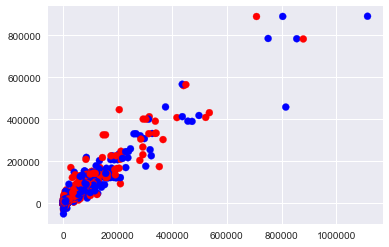

In [304]:
plt.scatter(y_test, pred, color=['red','blue'])
plt.show()

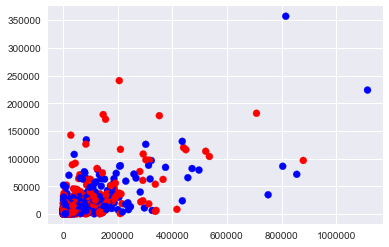

In [305]:
plt.scatter(y_test, abs(pred-y_test), color=['red','blue'])
plt.show()

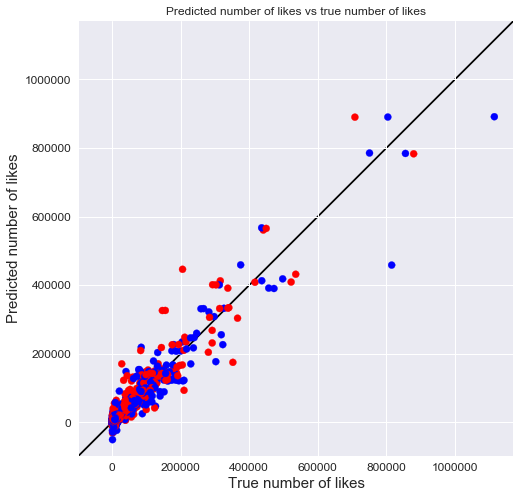

In [331]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test, pred, s=50, cmap=plt.cm.coolwarm, zorder=10, color=['red','blue'])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=1, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
ax.set_title('Predicted number of likes vs true number of likes')
ax.set_xlabel('True number of likes', fontsize=15) 
ax.set_ylabel('Predicted number of likes', fontsize=15) 

plt.show()

In [342]:
from scipy.stats.stats import pearsonr
cor, pval = pearsonr(y_test, pred)
print(round(cor*100,4),'%')

95.674 %


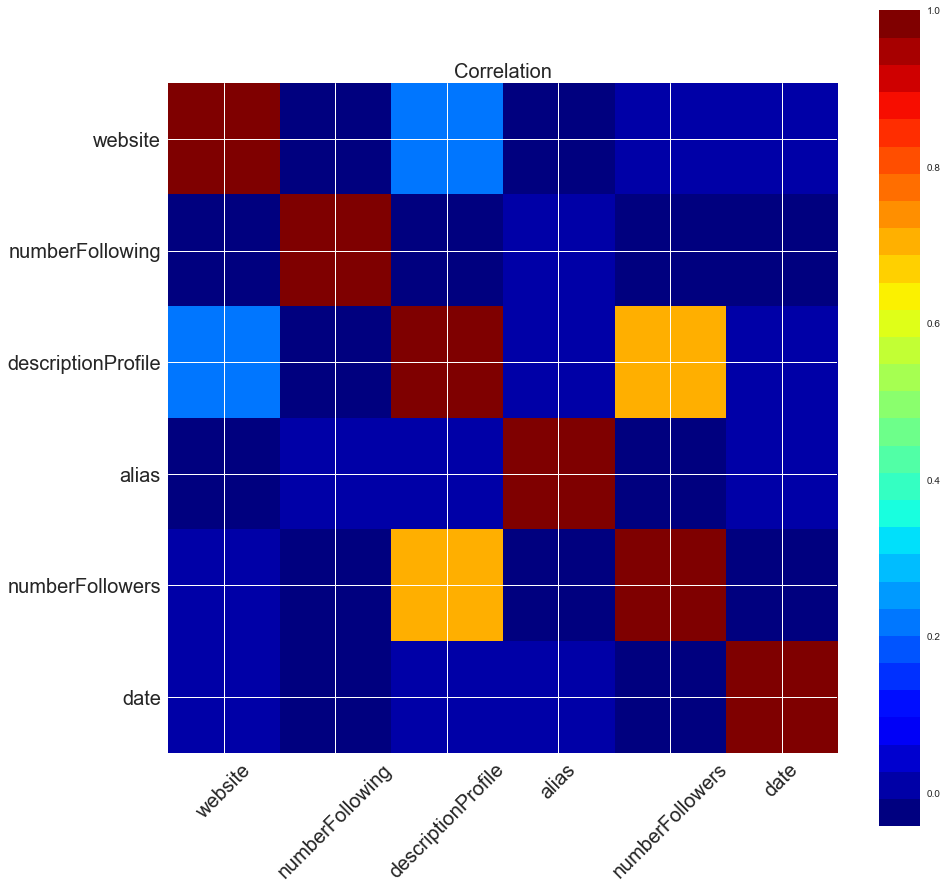

In [318]:
# multicollinearity?
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation', fontsize=20)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=20)
    plt.xticks(rotation = 45)
    ax1.set_yticklabels(labels,fontsize=20)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)
    plt.show()

correlation_matrix(processed)

In [294]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test,pred))
print(rms)

18676.906309224745


### GAM

In [75]:
from pygam import LinearGAM
from pygam.utils import generate_X_grid

In [77]:
X_train.to_csv("insta/X_train.csv")
y_train.to_csv("insta/y_train.csv")
X_test.to_csv("insta/X_test.csv")
y_test.to_csv("insta/y_test.csv")

### Gradient Boosting Regressor

In [295]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [343]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
print(sqrt(mse))
clf.score(X_test, y_test)

MSE: 367213803.6327
19162.823477574726


0.90939466609299791

~90% increase in performance after introduction of NLP features

## AdaBoost 

In [298]:
regr_1 = ensemble.RandomForestRegressor(max_depth=4)
regr_2 = ensemble.AdaBoostRegressor(ensemble.RandomForestRegressor(max_depth=4),
                                    n_estimators=300, random_state=np.random.RandomState(1))

In [299]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x00000203802110D8>)

In [300]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [301]:
print(sqrt(mean_squared_error(y_test, y_2)))

18671.544948634164


### Lasso Regression

In [344]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [303]:
print(sqrt(mean_squared_error(y_test, clf.predict(X_test))))

17707.451668483256


In [345]:
clf.score(X_test, y_test)

0.92263457825929196

---

# Data visualization

In [69]:
import warnings
warnings.filterwarnings('ignore')

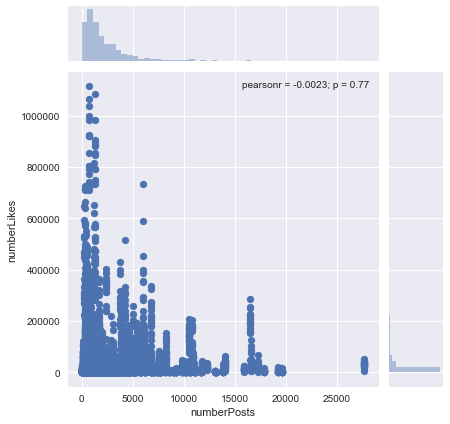

In [93]:
j1 = sns.jointplot(data=processed, x='numberPosts', y='numberLikes')

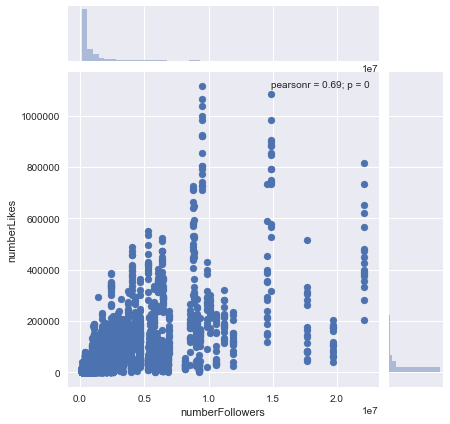

In [96]:
j1 = sns.jointplot(data=processed, x='numberFollowers', y='numberLikes')

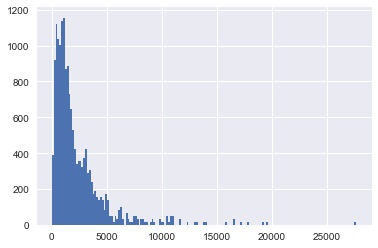

In [80]:
n1 = plt.hist(processed.numberPosts, bins='auto', histtype='bar')

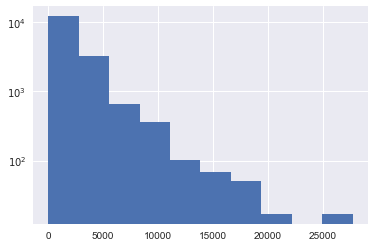

In [91]:
n1 = plt.hist(processed.numberPosts, log=True)

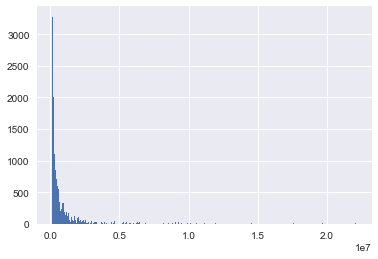

In [81]:
n2 = plt.hist(processed.numberFollowers, bins='auto', histtype='bar')

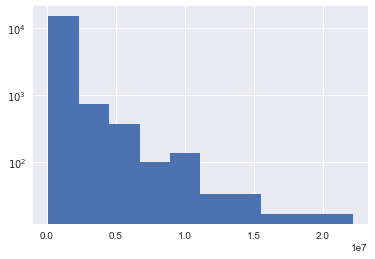

In [90]:
n2 = plt.hist(processed.numberFollowers, log=True)

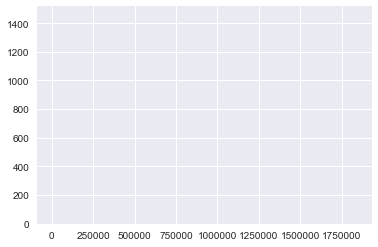

In [82]:
n3 = plt.hist(processed.numberFollowing, bins='auto', histtype='bar')

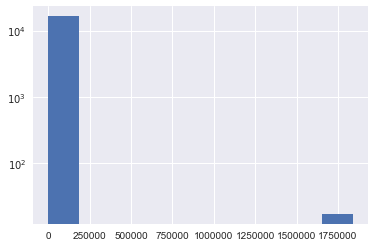

In [92]:
n3 = plt.hist(processed.numberFollowing, log=True)

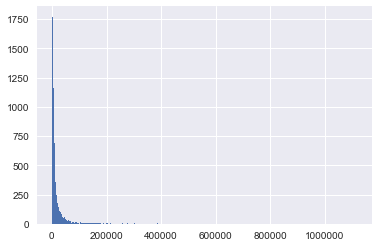

In [83]:
n4 = plt.hist(processed.numberLikes, bins='auto', histtype='bar')

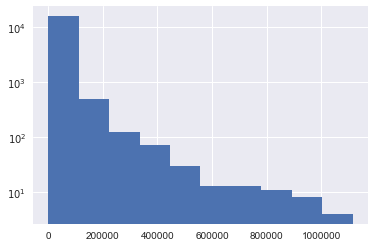

In [95]:
n4 = plt.hist(processed.numberLikes, log = True)

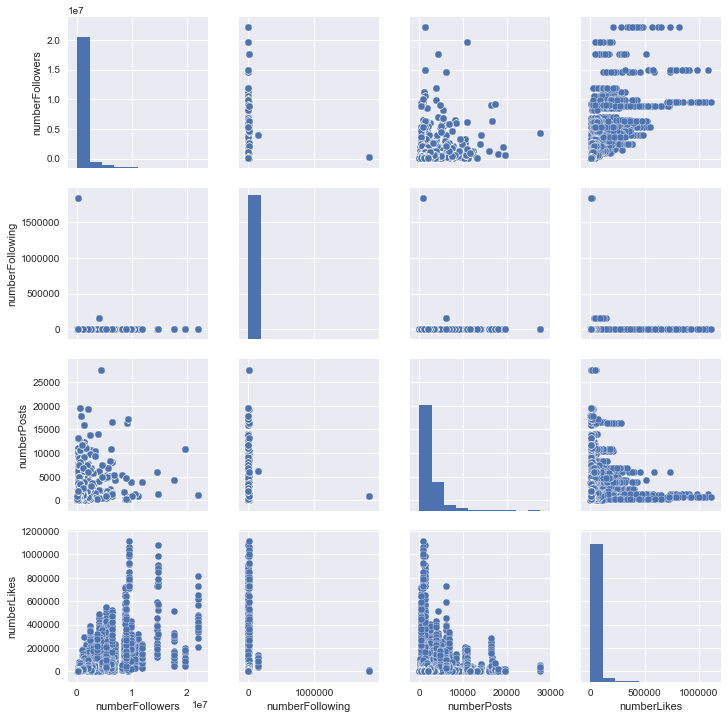

In [97]:
user = full[['numberFollowers', 'numberFollowing', 'numberPosts', 'numberLikes']]
sns.pairplot(user)

# NN

In [52]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [53]:
pro = processed

In [54]:
cols = list(pro.columns.values)

In [55]:
print(cols)

['numberPosts', 'numberFollowing', 'alias', 'numberFollowers', 'multipleImage', 'numberLikes', 'youtube', 'music', 'tumblr', 'facebook', 'blog', 'twitter', 'other', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'numberTags', 'numberMentions']


In [56]:
pr = pro[['numberPosts', 'numberFollowing', 'alias', 'numberFollowers', 'multipleImage', 'youtube', 'music', 'tumblr', 'facebook', 'blog', 'twitter', 'other', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'numberTags', 'numberMentions', 'numberLikes']]

In [57]:
dataset = pr.values

In [58]:
X = dataset[:,0:21]

In [59]:
Y = dataset[:,21]

In [60]:
#21

#define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(21, input_dim=21, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    #Complete model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [297]:
seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch = 100, batch_size=5, verbose=0)

#evaluate the baseline model. 10-fold cross validation
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %2f (%.2f) MSE" % (results.mean(), results.std()))

Results: 2256319031.999982 (1802579849.58) MSE


In [61]:
# define larger model
def larger_model():
    #create model
    model = Sequential()
    model.add(Dense(21, input_dim=21, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    #Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# 21 inputs -> [21 -> 8] -> 1 output

In [65]:
numpy.random.seed(7)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %2f (%.2f) MSE" % (results.mean(), results.std()))

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarnin

Larger: 2795003169.545209 (2536374719.56) MSE


In [63]:
def wider_model():
    #create model
    model = Sequential()
    model.add(Dense(30, input_dim=21, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    #compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# 21 inputs -> [30] -> 1 output

In [67]:
numpy.random.seed(7)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarnin

Wider: 2758380933.48 (2221797636.55) MSE
